In [1]:
%matplotlib inline

import numpy as np

from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [2]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [3]:
from utils import *

In [10]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

## Steps

1. Oraganize folders for data and push data into it
2. Use the vgg model with finetuning
3. Run mutliple epochs - See how the accuracy improves
4. Write the code from scratch in keras
5. Check if it is over fitting or under fitting - If underfitting, finetune 2 more layers
6. After overfitting, try data augmentation, batch normalization and drop out

### Organize folders and data

In [66]:
import os,sys,shutil
%cd /Users/anuragchilukuri/Documents/CatsDogs
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+"/data/redux"

/Users/anuragchilukuri/Documents/CatsDogs


In [45]:
from utils import *

Using TensorFlow backend.


In [45]:
%cd $DATA_HOME_DIR

/Users/anuragchilukuri/Documents/CatsDogs/data/redux


In [88]:
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test/unknown
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown

In [102]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i],DATA_HOME_DIR+'/valid/'+shuf[i])

In [104]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200): shutil.copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/' + shuf[i])

In [105]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50): shutil.copyfile(shuf[i],DATA_HOME_DIR+'/sample/valid/'+shuf[i])

In [44]:
%cd test/unknown

g=glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50):shutil.copyfile(shuf[i],DATA_HOME_DIR+'/sample/test/unknown/'+shuf[i])

/Users/anuragchilukuri/Documents/CatsDogs/data/redux/test/unknown


In [115]:
%cd $DATA_HOME_DIR/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats
%mv dog.*.jpg dogs

%cd $DATA_HOME_DIR/sample/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats
%mv dog.*.jpg dogs/

%cd $DATA_HOME_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats
%mv dog.*.jpg dogs

%cd $DATA_HOME_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats
%mv dog.*.jpg dogs

/Users/anuragchilukuri/Documents/CatsDogs/data/redux/sample/train
/Users/anuragchilukuri/Documents/CatsDogs/data/redux/sample/valid


In [118]:
%cd $DATA_HOME_DIR/test
%mkdir unknown
%mv *.jpg unknown

/Users/anuragchilukuri/Documents/CatsDogs/data/redux/test


### Finetuning vgg

In [7]:
DATA_HOME_DIR = "/home/ubuntu/nbs/data/dogscats/"

In [8]:
path = DATA_HOME_DIR #+ '/sample/'
train_path = path + 'train/'
test_path = path + 'test/'
valid_path = path +'valid/'
results_path = path +'results/'

In [11]:
batch_size=64
vgg = Vgg16()

In [13]:
%pwd

u'/home/ubuntu/nbs'

In [12]:
batches = vgg.get_batches(train_path,batch_size=batch_size)
val_batches = vgg.get_batches(valid_path,batch_size=batch_size)
vgg.finetune(batches)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
vgg.model.optimizer.lr = 0.01

In [14]:
no_of_epochs=2

In [25]:
1+1

2

In [20]:
%mkdir -p /home/ubuntu/nbs/data/dogscats/results/

In [ ]:
latest_weights_filename = None
for epoch in range(no_of_epochs):
    #print "Running epoch: %d" % epoch
    vgg.fit(batches,val_batches,nb_epoch=1)
    latest_weights_filename = "ft%d.h5" % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
print("Completed %s epoch runs" % (epoch+1))

Epoch 1/1
  192/23000 [..............................] - ETA: 769s - loss: 5.7049 - acc: 0.5052

In [ ]:
vgg.fit(batches,val_batches,nb_epoch=1)
latest_weights_filename = "ft%3.h5"
vgg.model.save_weights(results_path+latest_weights_filename)

Epoch 1/1
 5376/23000 [======>.......................] - ETA: 545s - loss: 0.4024 - acc: 0.9732

In [ ]:
vgg.fit(batches,val_batches,nb_epoch=1)
latest_weights_filename = "ft%3.h6"
vgg.model.save_weights(results_path+latest_weights_filename)

In [31]:
batches,preds = vgg.test(test_path,batch_size=batch_size*2)

Found 12500 images belonging to 1 classes.


In [28]:
print(preds[:5])

(<keras.preprocessing.image.DirectoryIterator object at 0x7f50d973e110>, array([[  1.0000e+00,   0.0000e+00],
       [  1.0000e+00,   8.3946e-21],
       [  1.0000e+00,   0.0000e+00],
       ..., 
       [  1.0000e+00,   0.0000e+00],
       [  1.0000e+00,   0.0000e+00],
       [  0.0000e+00,   1.0000e+00]], dtype=float32))


In [32]:
filenames = batches.filenames

In [33]:
print(filenames[:5])

['test1/9292.jpg', 'test1/12026.jpg', 'test1/9688.jpg', 'test1/4392.jpg', 'test1/779.jpg']


In [52]:
save_array(results_path+'test_preds.dat',preds)
save_array(results_path+'filenames.dat',filenames)

In [34]:
from PIL import Image

In [35]:
for i in filenames[:5]:
    Image.open(test_path+i)

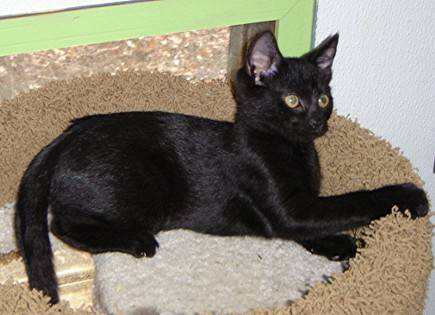

In [37]:
Image.open(test_path+'test1/10156.jpg')

In [38]:
our_predictions = preds[:,0]

In [53]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size*2)

Found 2000 images belonging to 2 classes.


In [54]:
filenames = val_batches.filenames
expected_labels = val_batches.classes

In [55]:
from keras.preprocessing import image
def plots_idx(idx,titles=None):
    plots([image.load_img(valid_path+val_filenames[idx]) for i in idx],titles=titles)

In [56]:
n_view = 4

In [57]:
expected_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [58]:
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [59]:
correct = np.where(our_labels==expected_labels)[0]
print("The number of correct labels is %d " % len(correct))

The number of correct labels is 1952 


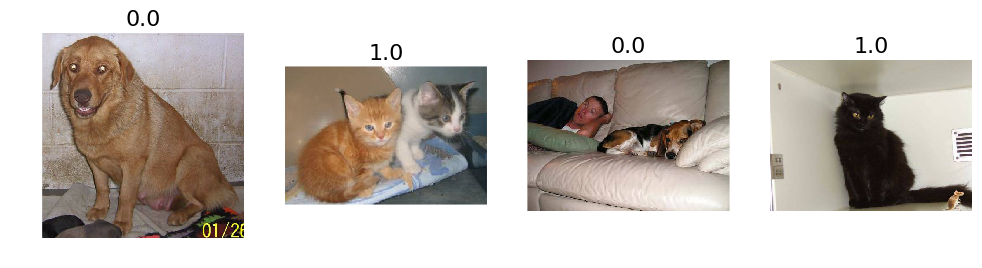

In [60]:
idx = np.random.permutation(correct)[:n_view]
plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=our_predictions[idx])

In [61]:
wrong = np.where(our_labels!=expected_labels)[0]
print("The number of wrong labels is %d" %len(wrong))

The number of wrong labels is 48


Found 961 correct cats


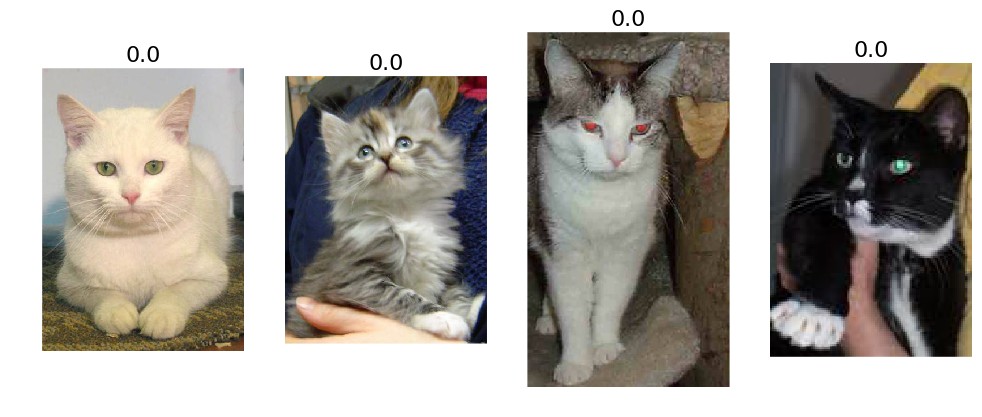

In [62]:
correct_cats = np.where((our_labels==0)&(our_labels==expected_labels))[0]
idx = np.random.permutation(correct_cats)[:n_view]
plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=our_labels[idx])
print("Found %d correct cats" % len(correct_cats))

Found 39 incorrect cats


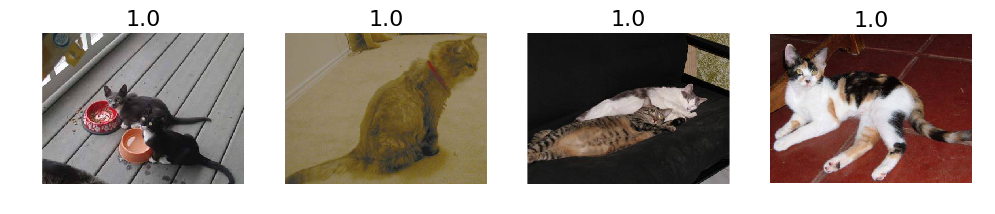

In [63]:
incorrect_cats = np.where((our_labels==1)&(our_labels!=expected_labels))[0]
idx = np.random.permutation(incorrect_cats)[:n_view]
plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=our_labels[idx])
print("Found %d incorrect cats" % len(incorrect_cats))

Found 991 correct dogs


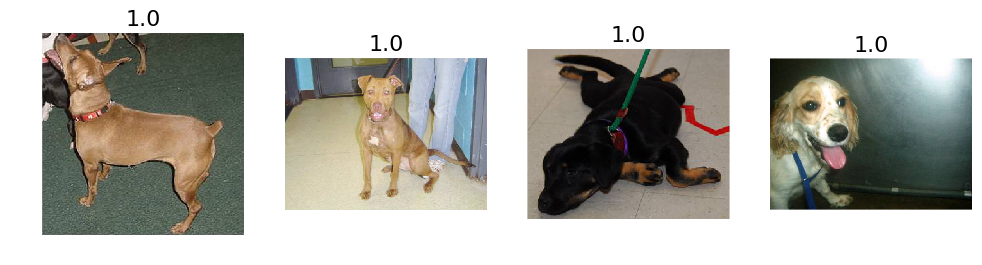

In [64]:
correct_dogs = np.where((our_labels==1)&(our_labels==expected_labels))[0]
idx = np.random.permutation(correct_dogs)[:n_view]
plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=our_labels[idx])
print("Found %d correct dogs" % len(correct_dogs))

Found 9 incorrect dogs


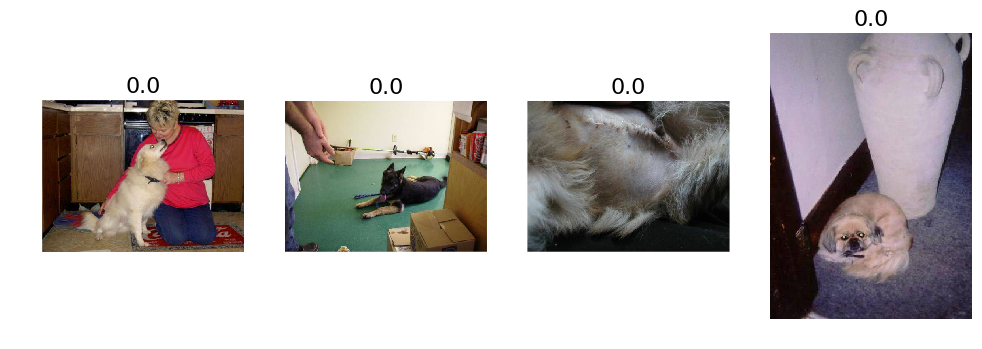

In [65]:
incorrect_dogs = np.where((our_labels==0)&(our_labels!=expected_labels))[0]
idx = np.random.permutation(incorrect_dogs)[:n_view]
plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=our_labels[idx])
print("Found %d incorrect dogs" % len(incorrect_dogs))

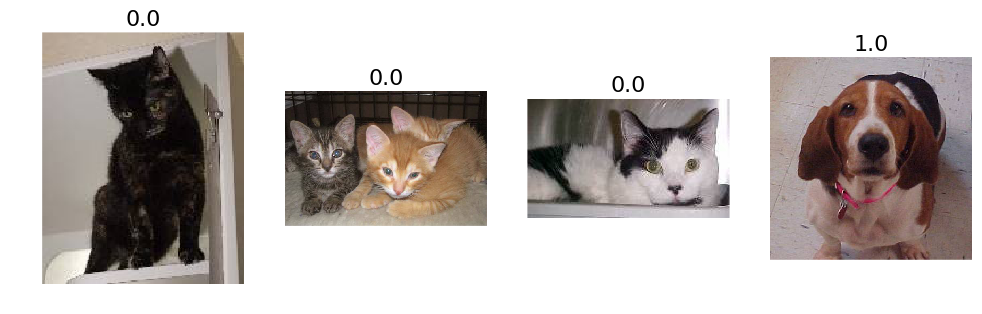

In [66]:
uncertain = np.argsort(abs(our_predictions-0.5))
idx = np.random.permutation(uncertain)[:n_view]
plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=our_labels[idx])

In [67]:
from sklearn.metrics import confusion_matrix

[[961  39]
 [  9 991]]


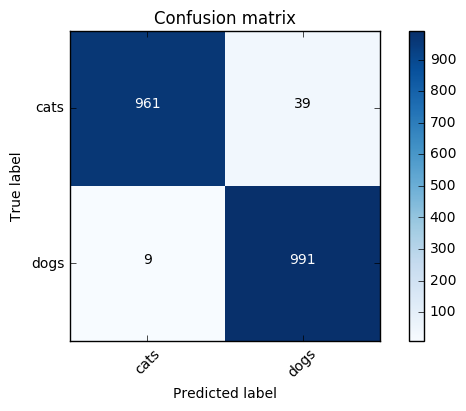

In [68]:
cm = confusion_matrix(expected_labels,our_labels)
plot_confusion_matrix(cm,val_batches.class_indices)

### Submit to Kaggle

In [69]:
preds = load_array(results_path + 'test_preds.dat')
filenames = load_array(results_path + 'filenames.dat')

In [71]:
isdog = preds[:,1]
print("Raw Predictions: " + str(isdog[:5]))
print("Mid Predictions: " + str(isdog[(isdog < .6) & (isdog > .4)]))
print("Edge Predictions: " + str(isdog[(isdog == 1) | (isdog == 0)]))

Raw Predictions: [  0.0000e+00   8.3946e-21   0.0000e+00   0.0000e+00   1.0000e+00]
Mid Predictions: [ 0.5209  0.403   0.4883]
Edge Predictions: [ 0.  0.  0. ...,  0.  0.  1.]


In [72]:
isdog = isdog.clip(min=0.05, max=0.95)

In [52]:
filenames = batches.filenames

In [74]:
def get_filename(x):
    return int(x[x.find("/")+1:x.find(".")])

In [75]:
filenumber = [get_filename(x) for x in filenames]

In [77]:
subm = np.stack([filenumber,isdog],axis=1)

In [78]:
%cd $DATA_HOME_DIR
submission_file_name = "submission.csv"
np.savetxt(submission_file_name,subm,fmt="%d,%0.5f",header='id,label',comments='')

/home/ubuntu/nbs/data/dogscats


In [5]:
from IPython.display import FileLink
FileLink("data/dogscats/submission.csv")

/home/ubuntu/nbs/data/dogscats/submission.csv